In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [45]:
df = pd.read_csv("Data/WDIData_T.csv");

In [46]:
indicators = [
 'Alternative and nuclear energy (% of total energy use)',
 'Air transport, freight (million ton-km)',
 'Combustible renewables and waste (% of total energy)',
 'Cereal yield (kg per hectare)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'Electricity production from coal sources (% of total)',
 'Electricity production from hydroelectric sources (% of total)',
 'Electricity production from natural gas sources (% of total)',
 'Electricity production from nuclear sources (% of total)',
 'Electricity production from oil sources (% of total)',
 'Electricity production from renewable sources, excluding hydroelectric (% of total)',
 'Energy use (kg of oil equivalent per capita)',
 'Fossil fuel energy consumption (% of total)',
 'Fuel imports (% of merchandise imports)',
 'GDP growth (annual %)',
 'GDP per capita (current US$)',
 'Population growth (annual %)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Urban population (% of total population)',
 'Urban population growth (annual %)', 
 'Methane emissions (kt of CO2 equivalent)',
 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
]

indicator_codes = [
'ALT_NUCL_EN_PERC',
'AIR_TRANS_FREIGHT',
'COMB_REN_WASTE_PERC',
'CEREAL_YIELD',
'CO2_EM_TOTAL',
'CO2_EM_PC',
'ELEC_PROD_COAL_PERC',
'ELEC_PROD_HYDRO_PERC',
'ELEC_PROD_NAT_GAS_PERC',
'ELEC_PROD_NUCL_PERC',
'ELEC_PROD_OIL_PERC',
'ELEC_PROD_RENW_SRC_PERC',
'EN_USE_PC',
'FOSSIL_FUEL_EN_CONS_PERC',
'FUEL_IMPORT_PERC',
'GDP_GROWTH_PERC',
'GDP_PC',
'POP_GROWTH_PERC',
'POP_URBAN_AGG',
'URBAN_POP_TOTAL',
'URBAN_POP_GROWTH',
'METHANE_EM',
'NO2_EM',
]

In [47]:
data = df[df['IndicatorName'].isin(indicators)]
data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,56005.299798
12,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.607448
124,Arab World,ARB,Population in urban agglomerations of more tha...,EN.URB.MCTY.TL.ZS,1960,14.372858
136,Arab World,ARB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,31.234143
146,Caribbean small states,CSS,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5878.201000
...,...,...,...,...,...,...
7564519,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2019,1463.985910
7564673,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,2019,1.419681
7564677,Zimbabwe,ZWE,Population in urban agglomerations of more tha...,EN.URB.MCTY.TL.ZS,2019,10.387589
7564779,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2019,32.210000


In [49]:
data['IndicatorName'].value_counts()

Urban population (% of total population)                                               15652
Population growth (annual %)                                                           15436
Urban population growth (annual %)                                                     15319
CO2 emissions (kt)                                                                     12988
CO2 emissions (metric tons per capita)                                                 12976
GDP per capita (current US$)                                                           12369
GDP growth (annual %)                                                                  11892
Cereal yield (kg per hectare)                                                          11781
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)                       10757
Methane emissions (kt of CO2 equivalent)                                               10714
Population in urban agglomerations of more than 1 million (% of total 

In [50]:
data = data.drop(['IndicatorCode', 'CountryName'], axis = 1)

In [51]:
data = data.reset_index(drop=True)
data

,CountryCode,IndicatorName,Year,Value
0,ARB,CO2 emissions (kt),1960,56005.299798
1,ARB,CO2 emissions (metric tons per capita),1960,0.607448
2,ARB,Population in urban agglomerations of more tha...,1960,14.372858
3,ARB,Urban population (% of total population),1960,31.234143
4,CSS,CO2 emissions (kt),1960,5878.201000
...,...,...,...,...
237243,ZWE,GDP per capita (current US$),2019,1463.985910
237244,ZWE,Population growth (annual %),2019,1.419681
237245,ZWE,Population in urban agglomerations of more tha...,2019,10.387589
237246,ZWE,Urban population (% of total population),2019,32.210000


In [52]:
dictionary_indicators = dict(zip(indicators, indicator_codes))
data['IndicatorName'] = data['IndicatorName'].replace(to_replace=dictionary_indicators)
data

,CountryCode,IndicatorName,Year,Value
0,ARB,CO2_EM_TOTAL,1960,56005.299798
1,ARB,CO2_EM_PC,1960,0.607448
2,ARB,POP_URBAN_AGG,1960,14.372858
3,ARB,URBAN_POP_TOTAL,1960,31.234143
4,CSS,CO2_EM_TOTAL,1960,5878.201000
...,...,...,...,...
237243,ZWE,GDP_PC,2019,1463.985910
237244,ZWE,POP_GROWTH_PERC,2019,1.419681
237245,ZWE,POP_URBAN_AGG,2019,10.387589
237246,ZWE,URBAN_POP_TOTAL,2019,32.210000


In [53]:
data_transformed = pd.pivot_table(data, values = 'Value', index=['CountryCode','Year'], columns = 'IndicatorName').reset_index()
data_transformed

IndicatorName,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,ABW,1960,NaN,NaN,NaN,204.620372,11092.675,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.776
1,ABW,1961,NaN,NaN,NaN,208.822811,11576.719,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.238144,NaN,2.209658,50.761
2,ABW,1962,NaN,NaN,NaN,226.118079,12713.489,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.409622,NaN,1.379868,50.746
3,ABW,1963,NaN,NaN,NaN,214.800370,12178.107,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.832453,NaN,0.799404,50.730
4,ABW,1964,NaN,NaN,NaN,207.615777,11840.743,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.592649,NaN,0.565140,50.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15771,ZWE,2015,0.796107,NaN,558.2,0.891624,12317.453,NaN,46.781337,51.395612,...,NaN,26.159057,1.779873,1445.071062,NaN,NaN,1.663813,10.856050,1.297036,32.385
15772,ZWE,2016,0.804947,NaN,581.8,0.782777,10982.665,NaN,NaN,NaN,...,NaN,28.192379,0.755869,1464.583529,NaN,NaN,1.549759,10.725311,1.274558,32.296
15773,ZWE,2017,0.665035,NaN,616.0,NaN,NaN,NaN,NaN,NaN,...,NaN,30.137697,4.704035,1548.170056,NaN,NaN,1.460061,10.605662,1.277192,32.237
15774,ZWE,2018,0.665035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.844844,4.829674,1683.740577,NaN,NaN,1.410783,10.492514,1.323892,32.209


In [54]:
#define an array with the unique year values
years_count_missing = dict.fromkeys(data_transformed['Year'].unique(), 0)
for ind, row in data_transformed.iterrows():
    years_count_missing[row['Year']] += row.isnull().sum()

# sort the years by missing values
years_missing_sorted = dict(sorted(years_count_missing.items(), key=lambda item: item[1]))

print("missing values by year:")
for key, val in years_missing_sorted.items():
    print(key, ":", val)

missing values by year:
2007 : 1090
2005 : 1103
2006 : 1103
2004 : 1106
2010 : 1124
2012 : 1124
2011 : 1132
2009 : 1152
2008 : 1158
2003 : 1168
2001 : 1169
2000 : 1172
2002 : 1179
1999 : 1242
1998 : 1255
1997 : 1257
1996 : 1270
1995 : 1292
1994 : 1341
1993 : 1346
1992 : 1371
1990 : 1417
1991 : 1448
2013 : 1617
2014 : 1659
1989 : 1721
1988 : 1725
1985 : 1734
1987 : 1735
1986 : 1738
1984 : 1748
1983 : 1753
1981 : 1761
1982 : 1767
1980 : 1783
1978 : 1793
1979 : 1793
1977 : 1794
1976 : 1798
1975 : 1806
1974 : 1822
1973 : 1850
1972 : 1861
1971 : 1868
2015 : 2308
1970 : 3059
2016 : 3512
1969 : 3731
1968 : 3734
1967 : 3740
1966 : 3749
1965 : 3764
1964 : 3792
1963 : 3804
1962 : 3813
1961 : 3909
2017 : 4016
2018 : 4257
2019 : 4569
1960 : 4698


In [55]:
# check the amount of missing values by country

# define an array with the unique country values
countries_count_missing = dict.fromkeys(data_transformed['CountryCode'].unique(), 0)

# iterate through all rows and count the amount of NaN values for each country
for ind, row in data_transformed.iterrows():
    countries_count_missing[row['CountryCode']] += row.isnull().sum()

# sort the countries by missing values
countries_missing_sorted = dict(sorted(countries_count_missing.items(), key=lambda item: item[1]))

print("missing values by country:")
for key, val in countries_missing_sorted.items():
    print(key, ":", val)

missing values by country:
CAN : 99
ESP : 99
GBR : 99
GRC : 99
JPN : 99
NAC : 99
OED : 99
PRT : 99
PST : 99
TUR : 99
USA : 99
AUS : 101
AUT : 101
FIN : 101
ITA : 103
FRA : 104
NLD : 105
CHE : 109
IRL : 111
NZL : 112
SWE : 113
EUU : 115
NOR : 116
DNK : 122
BEL : 146
HIC : 159
EMU : 162
EAR : 179
DEU : 181
POL : 183
WLD : 183
IBD : 204
IBT : 204
LMY : 204
LTE : 204
MIC : 204
UMC : 204
CHL : 209
KOR : 209
MEX : 209
LAC : 210
LCN : 210
TLA : 210
BRA : 214
COL : 215
IND : 215
PAK : 215
PHL : 215
SAS : 215
THA : 215
TSA : 215
ARG : 216
BOL : 216
ECU : 216
ISL : 216
PER : 216
MYS : 217
PAN : 217
CRI : 218
HUN : 219
LMC : 220
MAR : 220
ISR : 221
SEN : 221
EGY : 222
PRY : 224
SLV : 226
TUN : 226
IDN : 227
NGA : 227
DZA : 228
GTM : 228
CMR : 229
TGO : 230
CIV : 233
URY : 233
ZAF : 233
ECS : 234
GHA : 234
VEN : 234
HND : 235
KEN : 235
NIC : 237
NPL : 237
BGD : 239
COG : 240
JOR : 240
CHN : 241
SAU : 242
SSF : 242
TSS : 242
SSA : 243
IRN : 247
IDA : 249
MEA : 251
ZMB : 252
IDX : 256
ZWE : 258
HKG 

In [56]:
data_filtered = data_transformed[(data_transformed['Year'] >= 1971) & (data_transformed['Year'] <= 2014)]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered

IndicatorName,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,ABW,1971,NaN,NaN,NaN,243.870306,14495.651,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.4531,1.826948,0.636273,NaN,0.606851,50.609
1,ABW,1972,NaN,NaN,NaN,234.886547,14055.611,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.6570,1.844813,0.670693,NaN,0.639530,50.593
2,ABW,1973,NaN,NaN,NaN,258.819846,15592.084,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.8551,1.822090,0.671205,NaN,0.642030,50.578
3,ABW,1974,NaN,NaN,NaN,233.488931,14132.618,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0415,1.821157,0.471968,NaN,0.442080,50.563
4,ABW,1975,NaN,NaN,NaN,168.729034,10234.597,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.2194,1.829608,0.212898,NaN,0.182809,50.548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,ZWE,2010,25.138924,4.483218,733.7,0.614549,7803.376,69.395060,31.713791,66.924409,...,24.855705,17.509430,19.675323,948.331854,8420.5000,4187.077000,1.353893,11.612767,0.807137,33.196
11568,ZWE,2011,44.684921,3.807726,587.7,0.746236,9622.208,65.524806,41.655816,56.434462,...,28.492743,15.669212,14.193913,1093.654002,8504.7050,4228.947770,1.536391,11.474506,0.989645,33.015
11569,ZWE,2012,47.288226,3.648776,696.4,0.600303,7873.049,63.683975,39.052483,58.567858,...,28.860873,21.765971,16.665429,1304.969802,8588.9100,4270.818540,1.698001,11.319635,1.148264,32.834
11570,ZWE,2013,32.681952,3.295843,669.3,0.881705,11771.070,62.557786,45.464995,52.204807,...,29.095759,22.452636,1.989493,1430.000818,NaN,NaN,1.777645,11.157860,1.227921,32.654


In [57]:
data_filtered.isnull().sum()

IndicatorName
CountryCode                    0
Year                           0
AIR_TRANS_FREIGHT           3639
ALT_NUCL_EN_PERC            4006
CEREAL_YIELD                2385
CO2_EM_PC                   1380
CO2_EM_TOTAL                1374
COMB_REN_WASTE_PERC         4006
ELEC_PROD_COAL_PERC         4084
ELEC_PROD_HYDRO_PERC        4084
ELEC_PROD_NAT_GAS_PERC      4084
ELEC_PROD_NUCL_PERC         4084
ELEC_PROD_OIL_PERC          4084
ELEC_PROD_RENW_SRC_PERC     4084
EN_USE_PC                   4072
FOSSIL_FUEL_EN_CONS_PERC    4044
FUEL_IMPORT_PERC            4372
GDP_GROWTH_PERC             2212
GDP_PC                      2003
METHANE_EM                  1107
NO2_EM                      1065
POP_GROWTH_PERC               56
POP_URBAN_AGG               4686
URBAN_POP_GROWTH             143
URBAN_POP_TOTAL               91
dtype: int64

In [58]:
print("number of missing values in the whole dataset before filtering the countries:")
print(data_filtered.isnull().sum().sum())
print("number of rows before filtering the countries:")
print(data_filtered.shape[0])


# filter only rows for countries with less than 600 missing values
countries_filter = []
for key, val in countries_missing_sorted.items():
    if val < 600:
        countries_filter.append(key)

data_filtered = data_filtered[data_filtered['CountryCode'].isin(countries_filter)]

print("number of missing values in the whole dataset after filtering the countries:")
print(data_filtered.isnull().sum().sum())
print("number of rows after filtering the countries:")
print(data_filtered.shape[0])

number of missing values in the whole dataset before filtering the countries:
65145
number of rows before filtering the countries:
11572
number of missing values in the whole dataset after filtering the countries:
8412
number of rows after filtering the countries:
7172


In [59]:
data_filtered.isnull().sum()

IndicatorName
CountryCode                    0
Year                           0
AIR_TRANS_FREIGHT            735
ALT_NUCL_EN_PERC             149
CEREAL_YIELD                 396
CO2_EM_PC                    107
CO2_EM_TOTAL                 104
COMB_REN_WASTE_PERC          149
ELEC_PROD_COAL_PERC          228
ELEC_PROD_HYDRO_PERC         228
ELEC_PROD_NAT_GAS_PERC       228
ELEC_PROD_NUCL_PERC          228
ELEC_PROD_OIL_PERC           228
ELEC_PROD_RENW_SRC_PERC      228
EN_USE_PC                    389
FOSSIL_FUEL_EN_CONS_PERC     296
FUEL_IMPORT_PERC            1663
GDP_GROWTH_PERC              630
GDP_PC                       574
METHANE_EM                   326
NO2_EM                       326
POP_GROWTH_PERC                5
POP_URBAN_AGG               1191
URBAN_POP_GROWTH               4
URBAN_POP_TOTAL                0
dtype: int64

<AxesSubplot:xlabel='IndicatorName', ylabel='IndicatorName'>

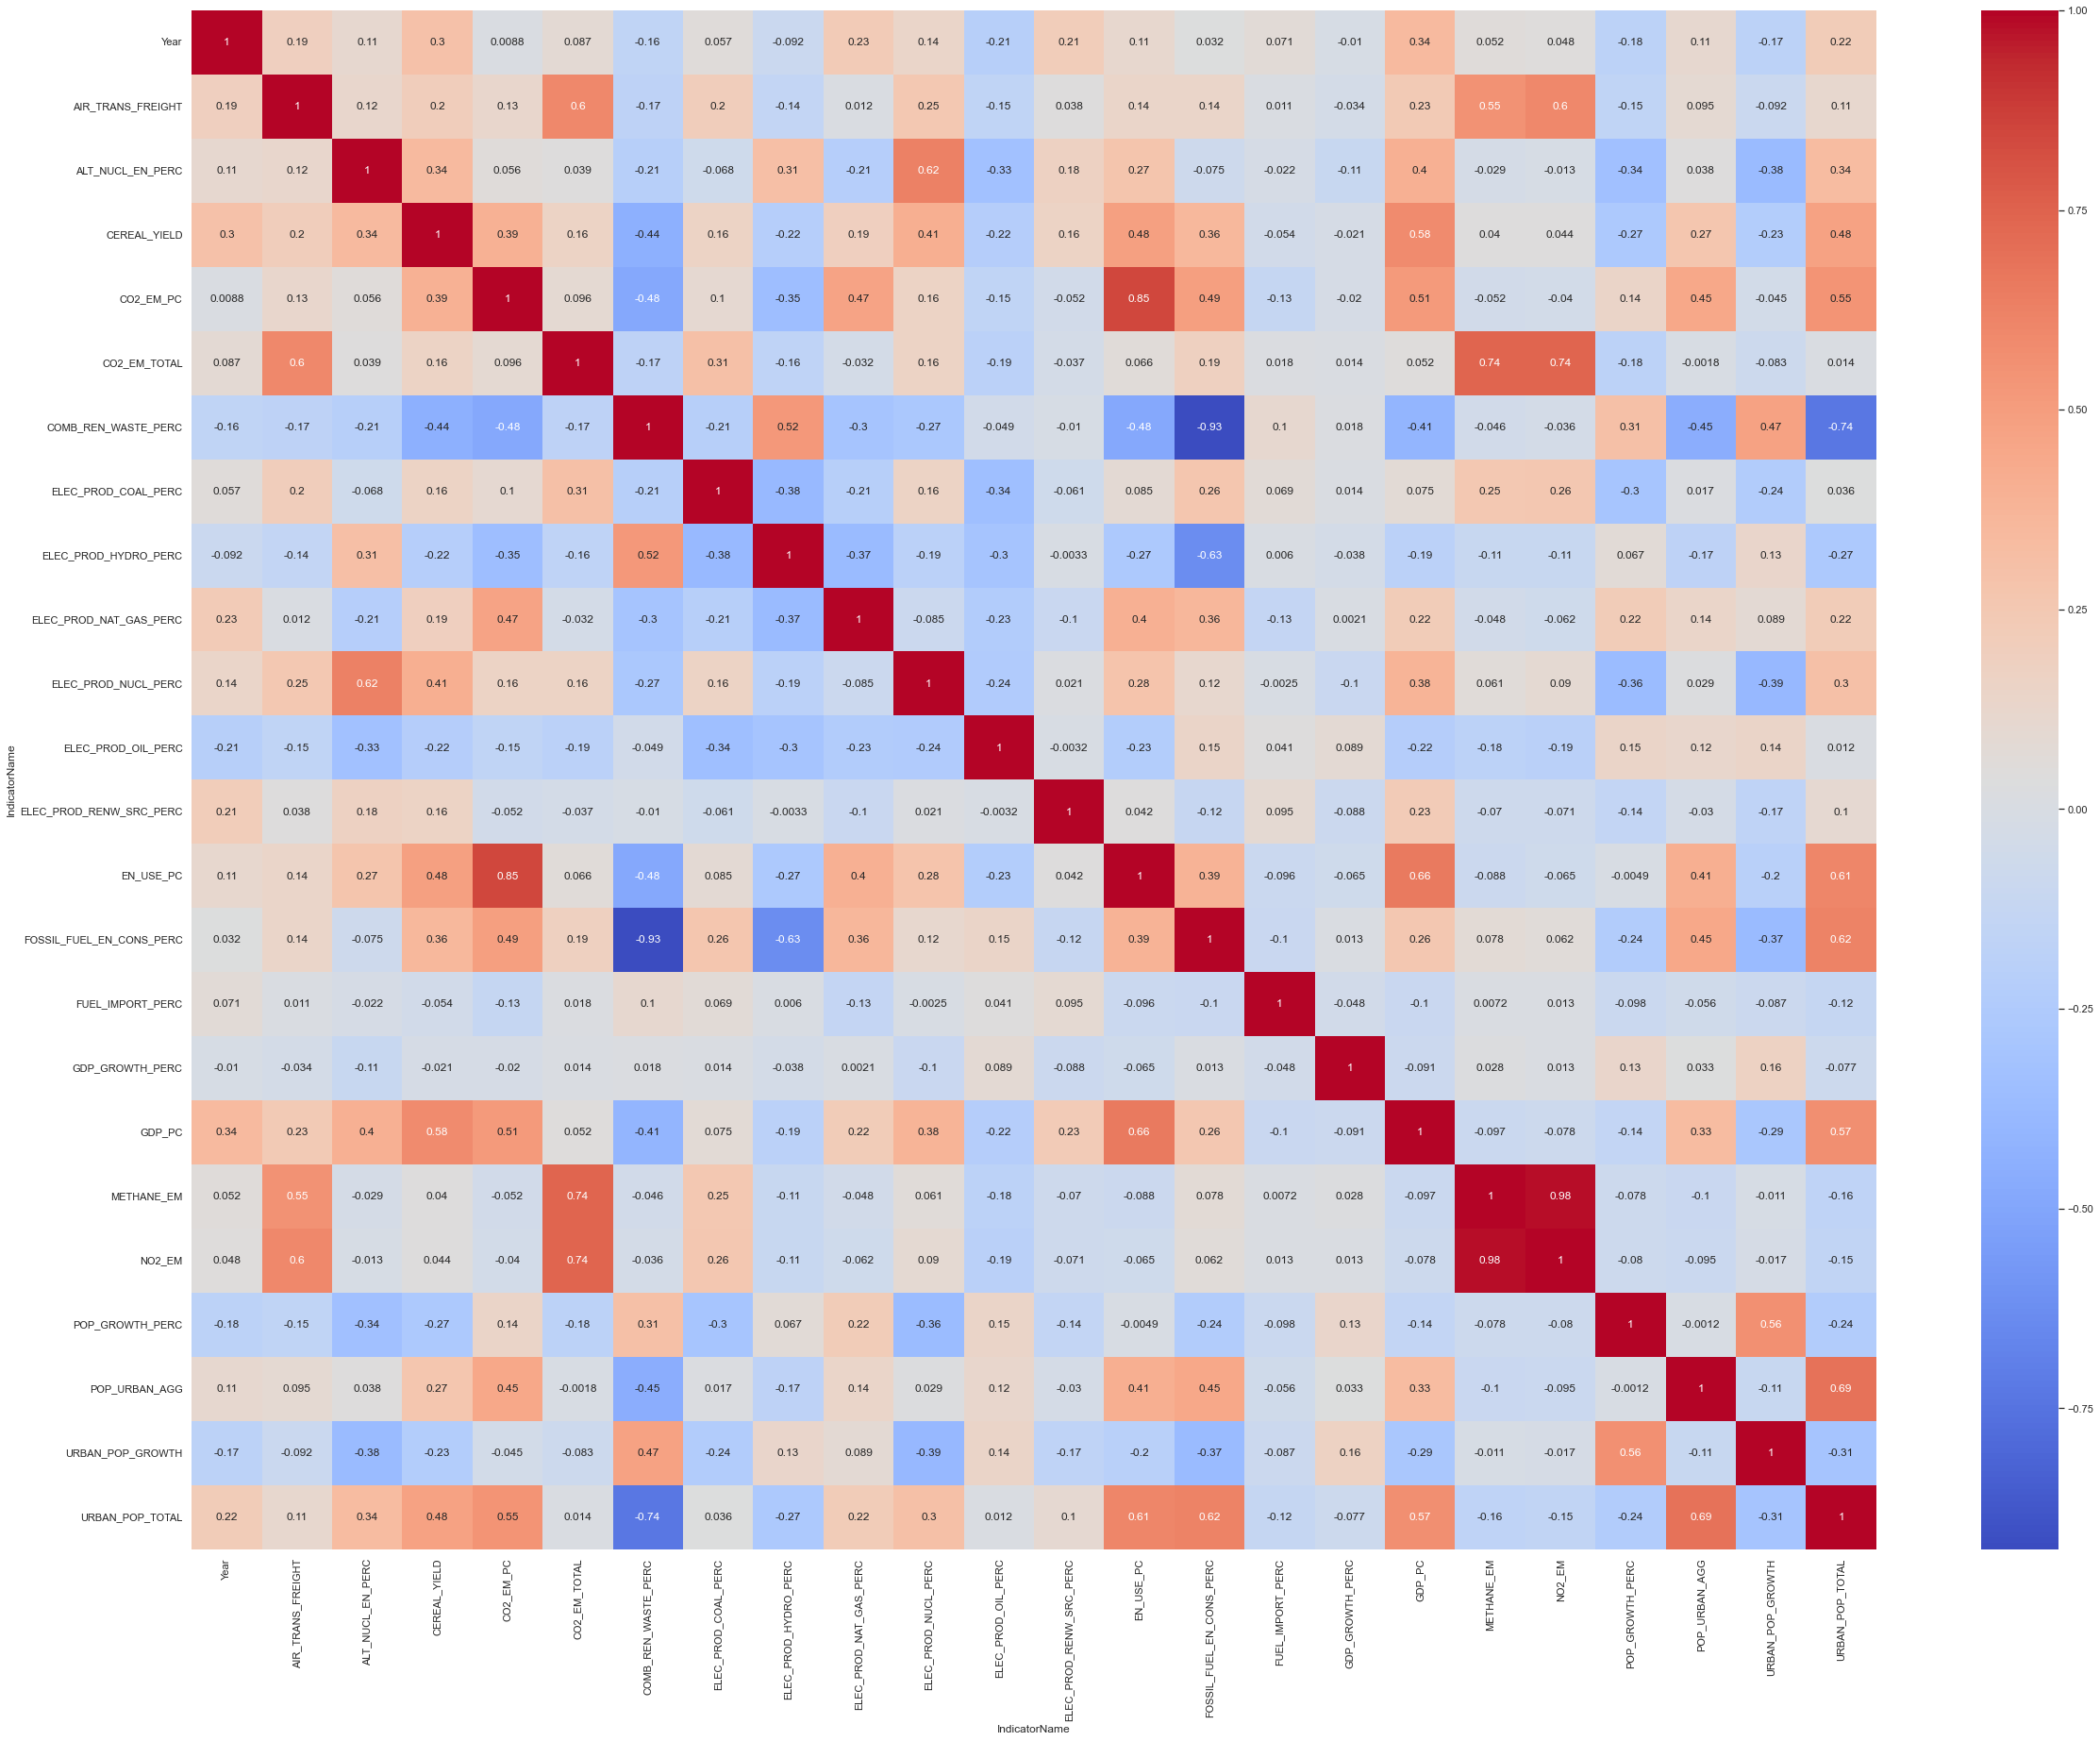

In [60]:
plt.subplots(figsize=(40,30))
sns.heatmap(data_filtered.corr(),cmap='coolwarm', annot=True)

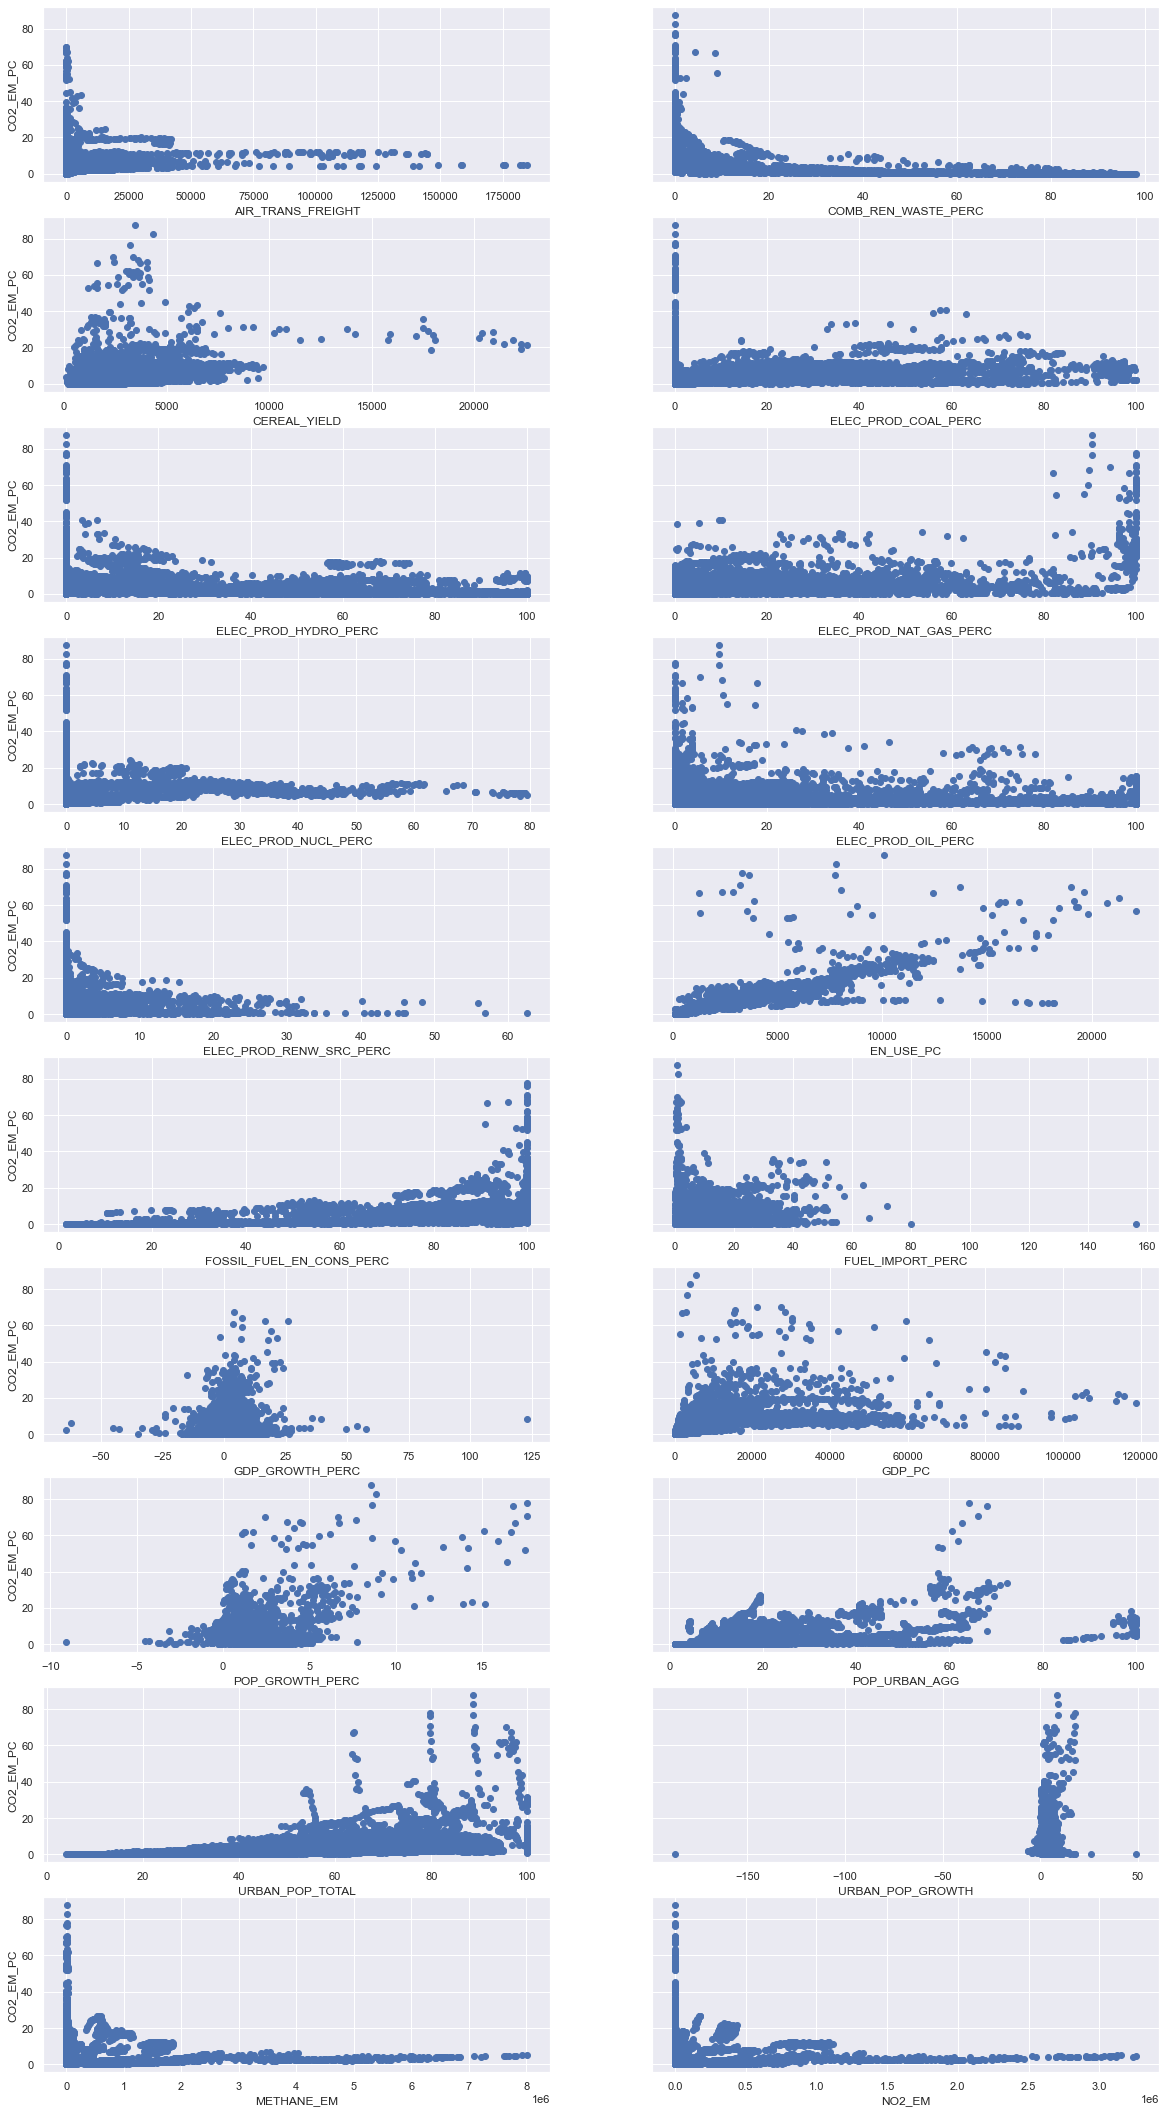

In [61]:
predictor_features = [
'AIR_TRANS_FREIGHT',
'COMB_REN_WASTE_PERC',
'CEREAL_YIELD',
'ELEC_PROD_COAL_PERC',
'ELEC_PROD_HYDRO_PERC',
'ELEC_PROD_NAT_GAS_PERC',
'ELEC_PROD_NUCL_PERC',
'ELEC_PROD_OIL_PERC',
'ELEC_PROD_RENW_SRC_PERC',
'EN_USE_PC',
'FOSSIL_FUEL_EN_CONS_PERC',
'FUEL_IMPORT_PERC',
'GDP_GROWTH_PERC',
'GDP_PC',
'POP_GROWTH_PERC',
'POP_URBAN_AGG',
'URBAN_POP_TOTAL',
'URBAN_POP_GROWTH',
'METHANE_EM',
'NO2_EM',]

# # Manually set the parameters of the figure to an appropriate size
plt.rcParams['figure.figsize'] = [20, 38]

# Call subplots specifying the desired grid structure
# The y axes should be shared
fig, axes = plt.subplots(nrows=10, ncols=2, sharey=True)

# Loop through the features that will be the predictors to build the plot
# Rearrange data into a 2D array of 8 rows and 3 columns
arr = np.array(predictor_features).reshape(10, 2)

# Use enumerate to loop over the 2D array of rows and columns
# Create scatter plots of each CO2_EM_PC vs each feature; CO2_EM_PC will be the dependent variable
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(data_filtered[feature], data_filtered['CO2_EM_PC'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='CO2_EM_PC')
        else: 
            axes[row, col].set(xlabel=feature)
plt.show() 

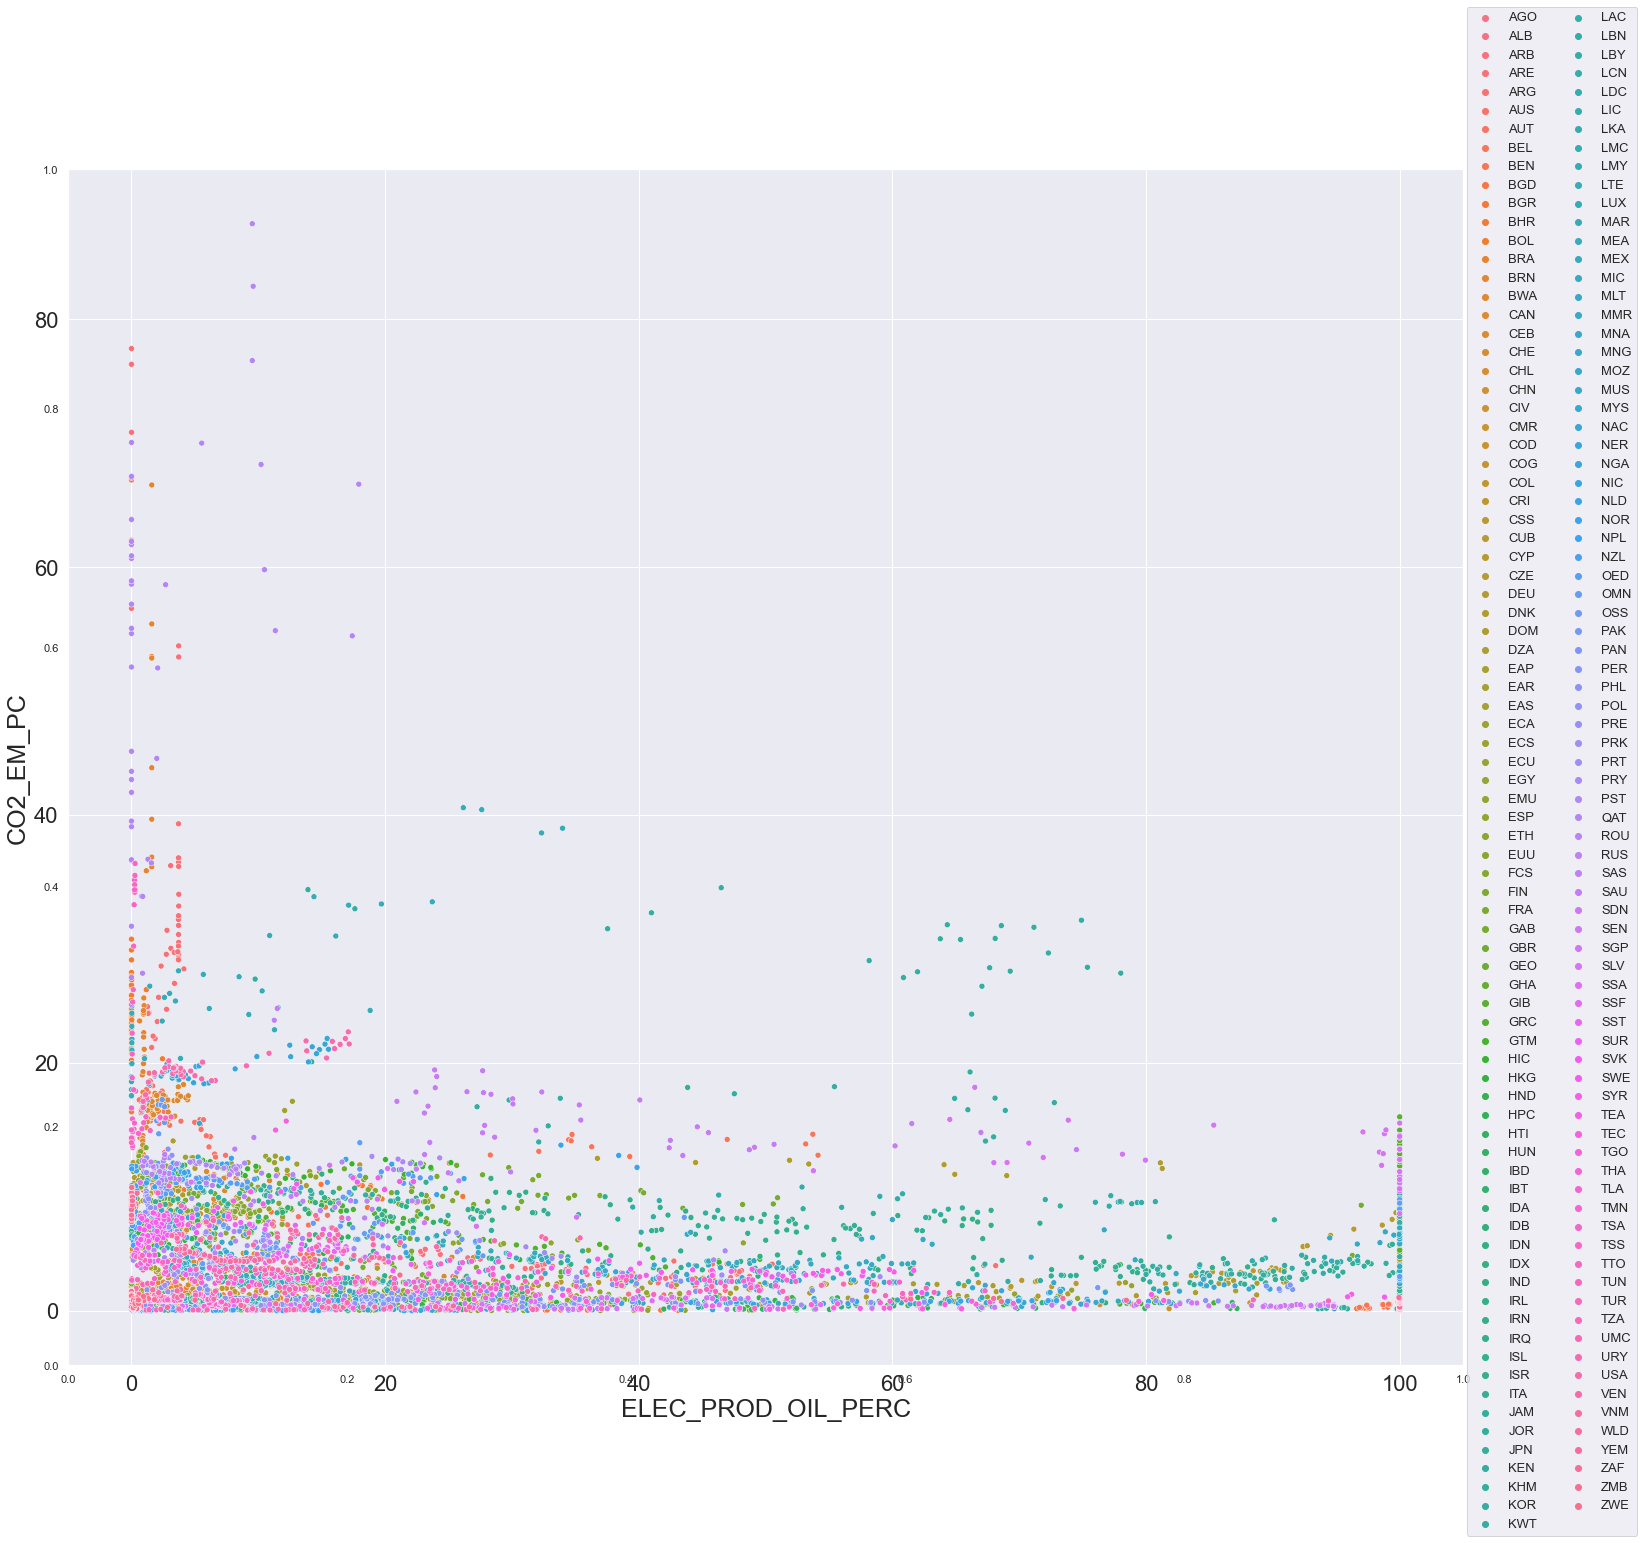

In [62]:
sns.set()

fig,ax=plt.subplots(figsize=(25,22))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in  [['ELEC_PROD_OIL_PERC', 'ELEC_PROD_OIL_PERC']]:
      
    ax = fig.add_subplot(1,1,ind)
    sns.scatterplot(ax=ax, x=col, y="CO2_EM_PC", data=data_filtered, hue="CountryCode", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel('CO2_EM_PC', fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

In [63]:
#remove the Arab Emirates, Brunei, Qatar outliers
data_filtered = data_filtered[(data_filtered['CountryCode']!='ARE') & (data_filtered['CountryCode']!='BRN') & (data_filtered['CountryCode']!='QAT')]

print("Shape of the dataset after removing the Arab Emirates, Brunei, Qatar outliers:")
data_filtered.shape

Shape of the dataset after removing the Arab Emirates, Brunei, Qatar outliers:


(7040, 25)

In [65]:
data_encoded = data_filtered.copy()
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Country'. 
data_encoded['CountryCode']= label_encoder.fit_transform(data_encoded['CountryCode']) 
data_encoded

IndicatorName,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
88,0,1971,NaN,1.351166,805.7,0.564548,3410.310,82.814638,0.000000,81.536388,...,15.834196,3.008041,NaN,NaN,14500.000,15844.22400,2.521468,8.088198,6.935496,15.632
89,0,1972,NaN,1.410646,780.3,0.721246,4506.743,77.328549,0.000000,81.145585,...,21.260806,4.912853,NaN,NaN,15590.000,16758.84800,3.381711,8.226706,8.512645,16.455
90,0,1973,NaN,1.694730,764.0,0.751240,4880.777,78.198305,0.000000,82.723577,...,20.106941,5.225642,NaN,NaN,16651.700,17638.93800,3.898493,8.323290,8.964003,17.310
91,0,1974,NaN,1.748593,712.6,0.720776,4873.443,77.325302,0.000000,69.812856,...,20.926104,4.493266,NaN,NaN,15008.300,14997.73800,3.989233,8.413978,9.013923,18.202
92,0,1975,NaN,1.982570,773.9,0.628569,4415.068,80.191191,0.000000,72.796935,...,17.826264,NaN,NaN,NaN,17061.400,17645.91300,3.810585,8.520843,8.772812,19.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,159,2010,25.138924,4.483218,733.7,0.614549,7803.376,69.395060,31.713791,66.924409,...,24.855705,17.509430,19.675323,948.331854,8420.500,4187.07700,1.353893,11.612767,0.807137,33.196
11568,159,2011,44.684921,3.807726,587.7,0.746236,9622.208,65.524806,41.655816,56.434462,...,28.492743,15.669212,14.193913,1093.654002,8504.705,4228.94777,1.536391,11.474506,0.989645,33.015
11569,159,2012,47.288226,3.648776,696.4,0.600303,7873.049,63.683975,39.052483,58.567858,...,28.860873,21.765971,16.665429,1304.969802,8588.910,4270.81854,1.698001,11.319635,1.148264,32.834
11570,159,2013,32.681952,3.295843,669.3,0.881705,11771.070,62.557786,45.464995,52.204807,...,29.095759,22.452636,1.989493,1430.000818,NaN,NaN,1.777645,11.157860,1.227921,32.654


In [66]:
data_encoded= data_encoded.reset_index(drop=True)
data_encoded

IndicatorName,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,0,1971,NaN,1.351166,805.7,0.564548,3410.310,82.814638,0.000000,81.536388,...,15.834196,3.008041,NaN,NaN,14500.000,15844.22400,2.521468,8.088198,6.935496,15.632
1,0,1972,NaN,1.410646,780.3,0.721246,4506.743,77.328549,0.000000,81.145585,...,21.260806,4.912853,NaN,NaN,15590.000,16758.84800,3.381711,8.226706,8.512645,16.455
2,0,1973,NaN,1.694730,764.0,0.751240,4880.777,78.198305,0.000000,82.723577,...,20.106941,5.225642,NaN,NaN,16651.700,17638.93800,3.898493,8.323290,8.964003,17.310
3,0,1974,NaN,1.748593,712.6,0.720776,4873.443,77.325302,0.000000,69.812856,...,20.926104,4.493266,NaN,NaN,15008.300,14997.73800,3.989233,8.413978,9.013923,18.202
4,0,1975,NaN,1.982570,773.9,0.628569,4415.068,80.191191,0.000000,72.796935,...,17.826264,NaN,NaN,NaN,17061.400,17645.91300,3.810585,8.520843,8.772812,19.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,159,2010,25.138924,4.483218,733.7,0.614549,7803.376,69.395060,31.713791,66.924409,...,24.855705,17.509430,19.675323,948.331854,8420.500,4187.07700,1.353893,11.612767,0.807137,33.196
7036,159,2011,44.684921,3.807726,587.7,0.746236,9622.208,65.524806,41.655816,56.434462,...,28.492743,15.669212,14.193913,1093.654002,8504.705,4228.94777,1.536391,11.474506,0.989645,33.015
7037,159,2012,47.288226,3.648776,696.4,0.600303,7873.049,63.683975,39.052483,58.567858,...,28.860873,21.765971,16.665429,1304.969802,8588.910,4270.81854,1.698001,11.319635,1.148264,32.834
7038,159,2013,32.681952,3.295843,669.3,0.881705,11771.070,62.557786,45.464995,52.204807,...,29.095759,22.452636,1.989493,1430.000818,NaN,NaN,1.777645,11.157860,1.227921,32.654


In [67]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data_imputed = pd.DataFrame(imp.fit_transform(data_encoded))
data_imputed.columns = data_encoded.columns
data_imputed.index = data_encoded.index

In [68]:
data_imputed.isnull().sum()

IndicatorName
CountryCode                 0
Year                        0
AIR_TRANS_FREIGHT           0
ALT_NUCL_EN_PERC            0
CEREAL_YIELD                0
CO2_EM_PC                   0
CO2_EM_TOTAL                0
COMB_REN_WASTE_PERC         0
ELEC_PROD_COAL_PERC         0
ELEC_PROD_HYDRO_PERC        0
ELEC_PROD_NAT_GAS_PERC      0
ELEC_PROD_NUCL_PERC         0
ELEC_PROD_OIL_PERC          0
ELEC_PROD_RENW_SRC_PERC     0
EN_USE_PC                   0
FOSSIL_FUEL_EN_CONS_PERC    0
FUEL_IMPORT_PERC            0
GDP_GROWTH_PERC             0
GDP_PC                      0
METHANE_EM                  0
NO2_EM                      0
POP_GROWTH_PERC             0
POP_URBAN_AGG               0
URBAN_POP_GROWTH            0
URBAN_POP_TOTAL             0
dtype: int64

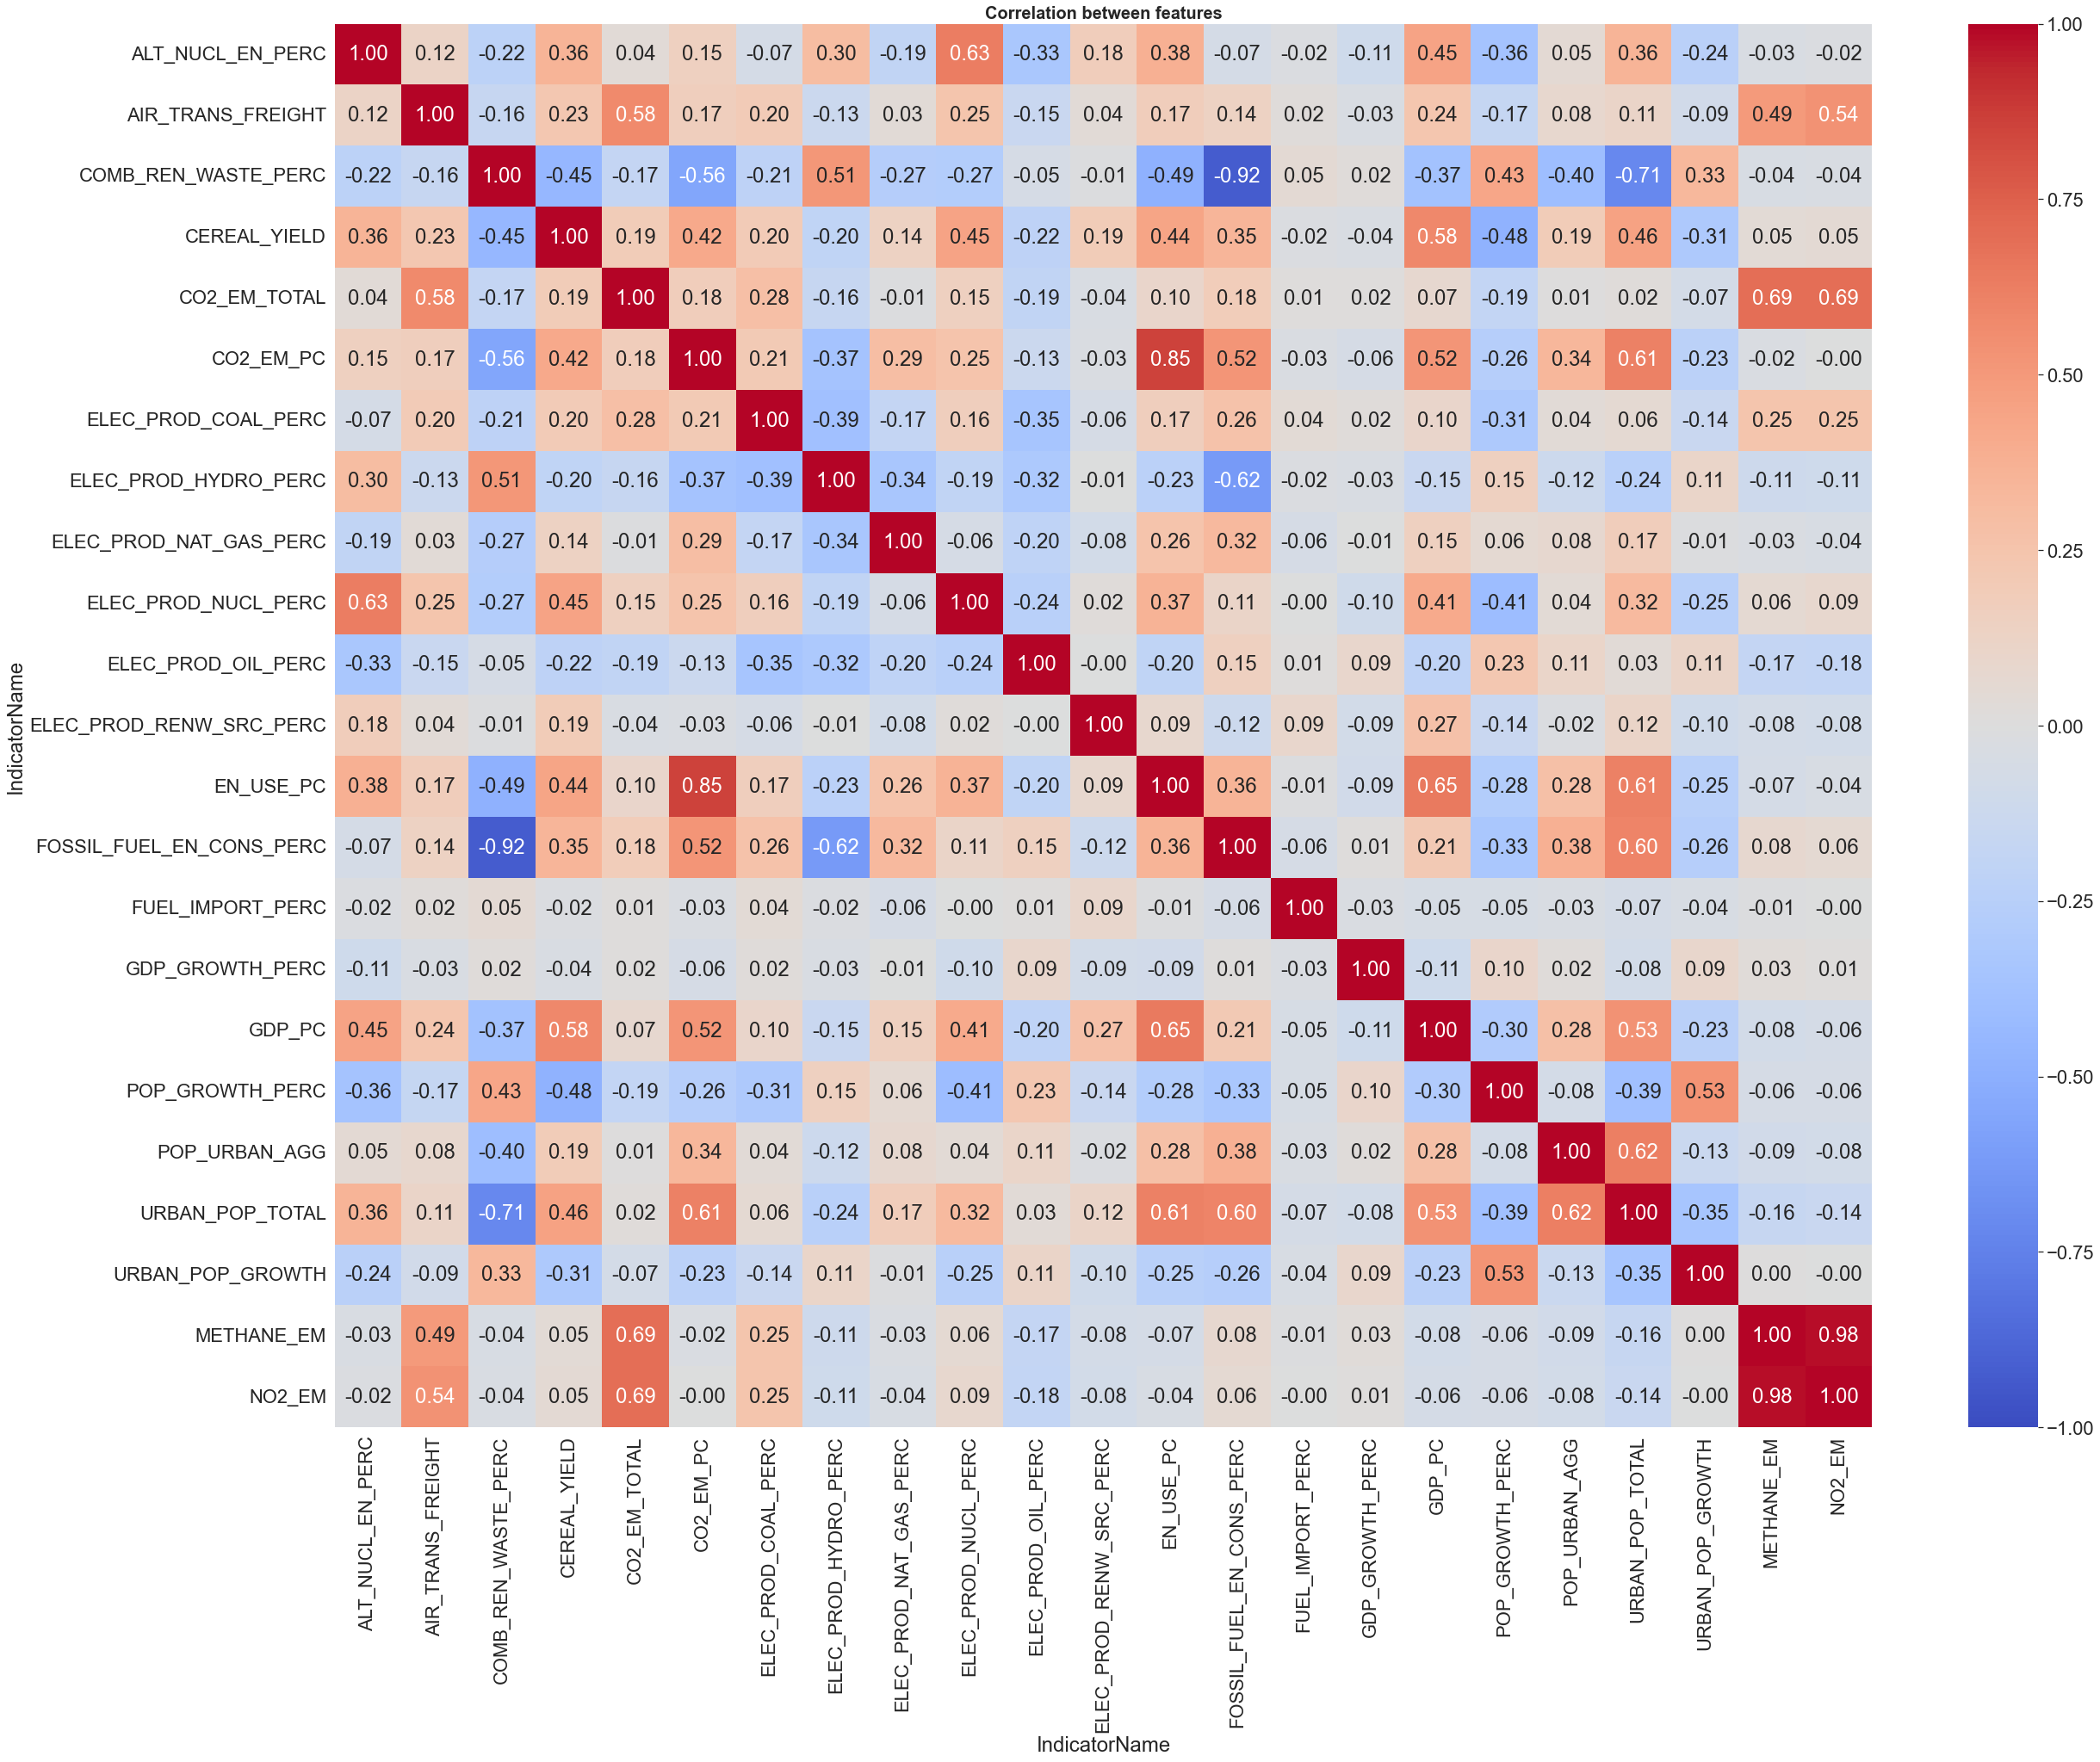

In [69]:
data_features = data_imputed[indicator_codes]

# plot a correlation of all features
# correlation matrix
sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(40,30))
sns.heatmap(data_features.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=20, weight='bold' )
plt.show()

sns.set(font_scale=1)

In [72]:
# export the clean dataframe to a csv file
data_imputed.to_csv('data_preprocessed.csv', index=False)